# Projeto K Vizinhos Mais Próximos - Soluções

## Importação das bibliotecas
**Importe pandas,seaborn, e as bibliotecas usuais.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Obtendo os dados
**Leia o arquivo 'KNN_Project_Data' csv em um dataframe**

In [ ]:
import os
from google.colab import drive

drive.mount('/content/drive')
os.chdir("drive/My Drive/Colab Notebooks/IA/14_KNN")
os.listdir()

Mounted at /content/drive


['02-K Nearest Neighbors Project.ipynb',
 'KNN_Project_Data',
 'Classified Data',
 '01-K Vizinhos Mais Próximos com Python.ipynb',
 '03-Projeto K Vizinhos Mais Próximos - Soluções.ipynb']

In [ ]:
df = pd.read_csv('KNN_Project_Data')

**Verifique o cabeçalho do dataframe.**

In [ ]:
df.head() 

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# EDA

Como esses dados são artificiais, faremos apenas um grande gráfico pairplot com seaborn.

**Use seaborn no dataframe para criar um pairplot com a tonalidade indicada pela coluna TARGET CLASS.**

In [ ]:
sns.pairplot(df,hue='TARGET CLASS',palette='coolwarm')

Output hidden; open in https://colab.research.google.com to view.

# Padronizar as Variáveis

Hora de padronizar as Variáveis.

**Importe StandardScaler do Scikit learn.**

In [ ]:
from sklearn.preprocessing import StandardScaler

**Crie um objeto StandardScaler() chamado scaler.**

In [ ]:
scaler = StandardScaler()

**Ajuste scaler as características.**

In [ ]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

**Utilize o método .transform() para transformar as caracteristicas para uma versão em escala.**

In [ ]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

**Converta as caracteristicas  em escala para um dataframe e verifique o cabeçalho deste dataframe para ter certeza que o processo funcionou.**

In [ ]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split

**Use train_test_split para dividir seus dados em um conjunto de treinamento e um conjunto de teste.**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30, random_state=101)

# Utilizando KNN

**Importe KNeighborsClassifier do scikit learn.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

**Crie uma instânicia do modelo KNN com n_neighbors=1**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

**Ajuste este modelo KNN aos dados de treinamento.**

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Previsões e avaliações

**Use o método predict para prever valores utilizando o seu modelo KNN e X_test.**

In [ ]:
pred = knn.predict(X_test)

**Construa uma matriz de confusão e um relatório de classificação.**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,pred))

[[109  43]
 [ 41 107]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



## Escolhendo o valor de K

**Crie um loop de for que treine vários modelos KNN com diferentes valores de k e, em seguida, acompanhe o error_rate para cada um desses modelos com uma lista.**

In [ ]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

**Agora crie um gráfico usando as informações do seu loop for.**

Text(0, 0.5, 'Error Rate')

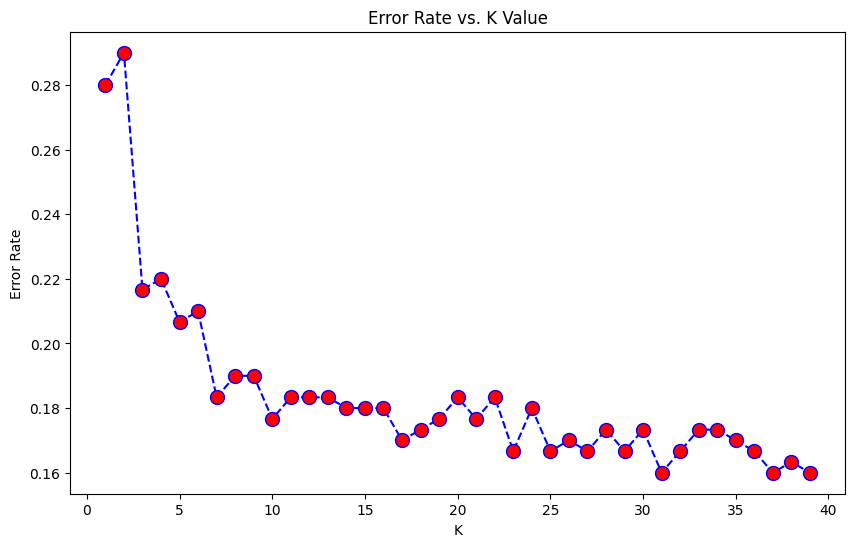

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Treine novamente com o novo valor de K

**Treine novamente seu modelo com o melhor valor de K (você decide o que deseja) e refaça o relatório de classificação e a matriz de confusão.**

In [ ]:
#K=30
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[124  28]
 [ 24 124]]


              precision    recall  f1-score   support

           0       0.84      0.82      0.83       152
           1       0.82      0.84      0.83       148

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

